In [242]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [243]:
df = pd.read_csv('./File/Cost_of_Living_Index_by_Country_2024.csv')

df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [244]:
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [245]:
df.dtypes

Rank                                int64
Country                            object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

In [246]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


#  Countries with the Highest and Lowest Cost of Living
# Países com Maior e Menor Custo de Vida

In [247]:
max_10 = df.head(10)
min_10 = df.tail(10)

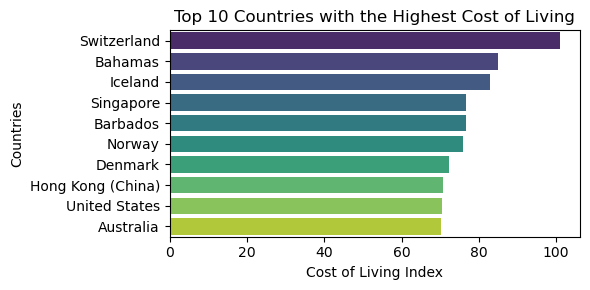

In [248]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Cost of Living Index', y='Country', data=max_10, palette='viridis')
plt.xlabel('Cost of Living Index')
plt.ylabel('Countries')
plt.title('Top 10 Countries with the Highest Cost of Living')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


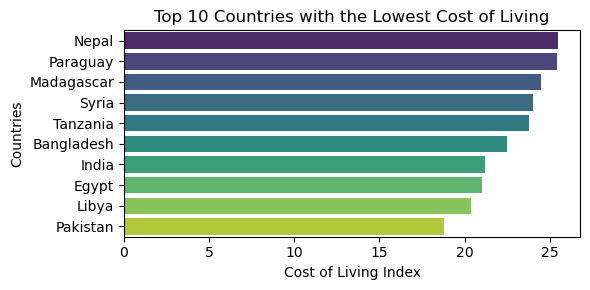

In [249]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Cost of Living Index', y='Country', data=min_10, palette='viridis')
plt.xlabel('Cost of Living Index')
plt.ylabel('Countries')
plt.title('Top 10 Countries with the Lowest Cost of Living')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### Purchasing Power X Cost of Living
### Poder de Compra X Custo de Vida

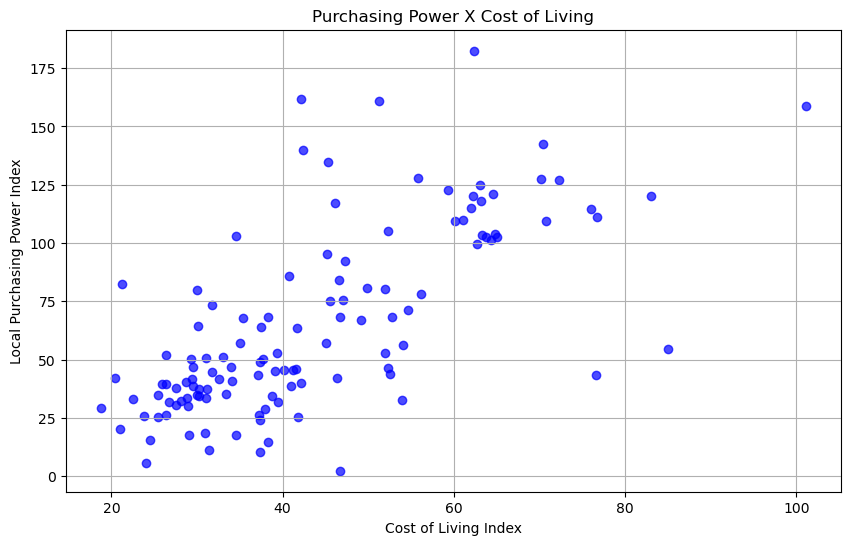

In [250]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Cost of Living Index'], df['Local Purchasing Power Index'], alpha=0.7, c='blue')
plt.title('Purchasing Power X Cost of Living')
plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
plt.grid(True)

plt.show()


In [251]:
df['Purchasing Power Ratio'] = df['Local Purchasing Power Index'] / df['Cost of Living Index']

print(df[['Country', 'Purchasing Power Ratio']])


         Country  Purchasing Power Ratio
0    Switzerland                1.569733
1        Bahamas                0.642353
2        Iceland                1.449398
3      Singapore                1.448501
4       Barbados                0.567885
..           ...                     ...
116   Bangladesh                1.471111
117        India                3.896226
118        Egypt                0.952381
119        Libya                2.058824
120     Pakistan                1.547872

[121 rows x 2 columns]


### Countries with Highest and Lowest Local Purchasing Power
### Países com Maior e Menor Poder de Compra Local

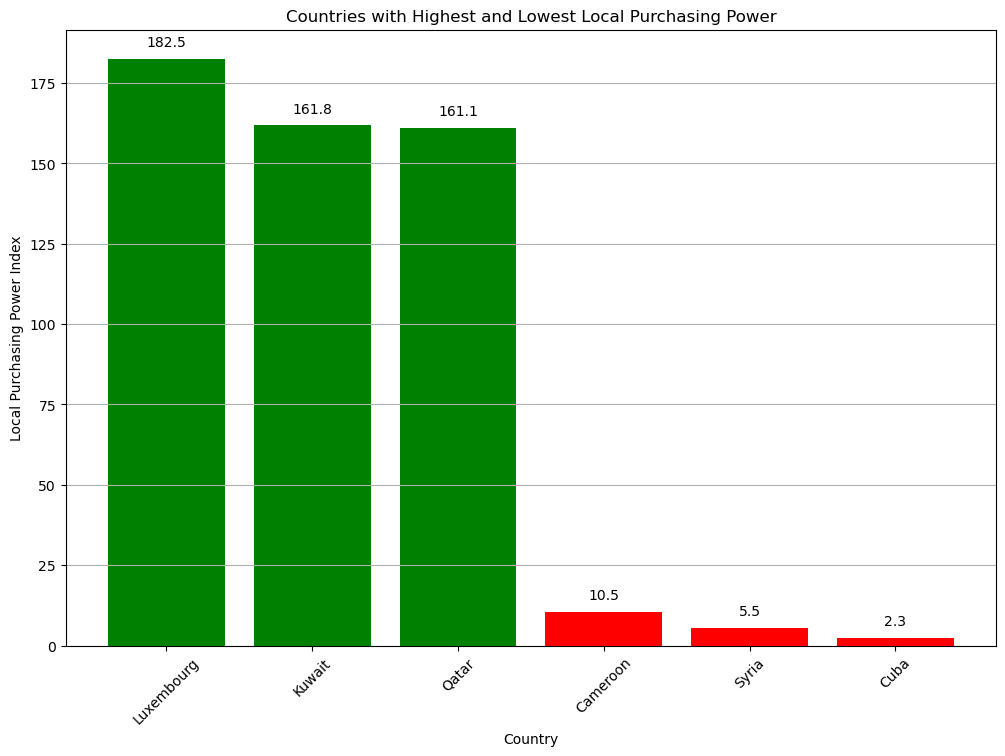

In [252]:
df_sorted = df.sort_values(by='Local Purchasing Power Index', ascending=False)

high_power = df_sorted.head(3)
low_power = df_sorted.tail(3)

HL_power = pd.concat([high_power, low_power])


plt.figure(figsize=(12, 8))
bars = plt.bar(HL_power['Country'], HL_power['Local Purchasing Power Index'], color=['green']*3 + ['red']*3)
plt.title('Countries with Highest and Lowest Local Purchasing Power')
plt.xlabel('Country')
plt.ylabel('Local Purchasing Power Index')

# Add value labels on the bars
# Adicionar rótulos de valor nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()